<a href="https://colab.research.google.com/github/Memoona028/Plant-disease-detection-ANN-Project-/blob/main/ANN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Dataset Source : https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset

#####Base Paper Source : https://arxiv.org/ftp/arxiv/papers/1604/1604.03169.pdf

###Description
- This dataset consists of 55,448  healthy and unhealthy leaf images divided into 38 categories by species and disease.
- It contains 38 folders of different categories

####Extracting the zip file from drive

In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to the zip file in your Google Drive
zip_file_path = '/content/drive/My Drive/Plant_leaf_diseases_dataset_without_augmentation.zip'

# Directory to extract the contents of the zip file
extract_dir = '/content/drive/My Drive/Plant_leaf_diseases_dataset_without_augmentation/'

# Extracting  the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Checking the contents of the extracted directory
extracted_files = os.listdir(extract_dir)
print("Extracted files from drive :", extracted_files)

Mounted at /content/drive


- Checking the no of pictures in zip file(without augmentation)

In [ ]:

# Path to the zip file in Google Drive
zip_file_path = '/content/drive/My Drive/Plant_leaf_diseases_dataset_without_augmentation.zip'

# Function to count the number of files
def count_files_in_zip(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        file_list = zip_ref.namelist()
        num_files = len(file_list)
    return num_files

# Getting the total number of pictures in the zip file
total_pictures = count_files_in_zip(zip_file_path)
print("Total number of pictures in the zip file:", total_pictures)


Total number of pictures in the zip file: 55488


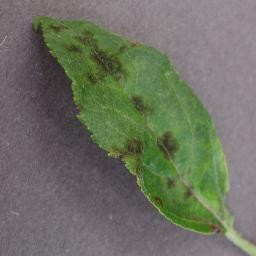

Image 'image (335).JPG' from folder 'Apple___Apple_scab'


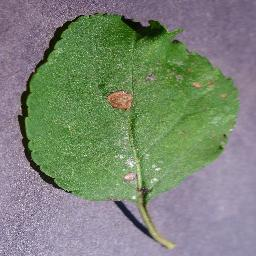

Image 'image (29).JPG' from folder 'Apple___Black_rot'


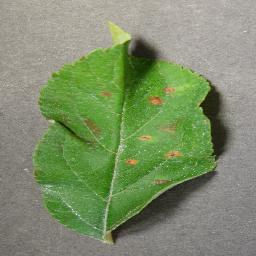

Image 'image (103).JPG' from folder 'Apple___Cedar_apple_rust'


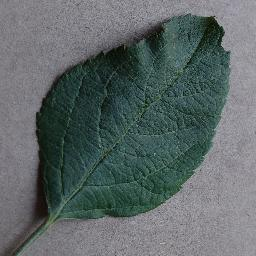

Image 'image (400).JPG' from folder 'Apple___healthy'


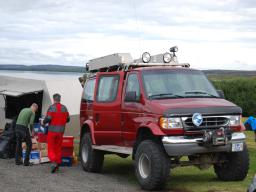

Image 'image (610).jpg' from folder 'Background_without_leaves'


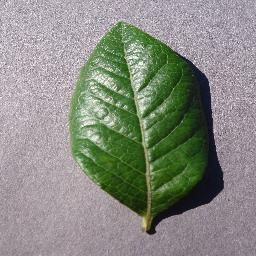

Image 'image (281).JPG' from folder 'Blueberry___healthy'


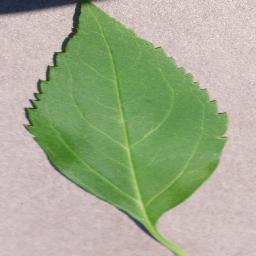

Image 'image (335).JPG' from folder 'Cherry___healthy'


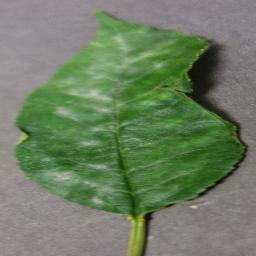

Image 'image (135).JPG' from folder 'Cherry___Powdery_mildew'


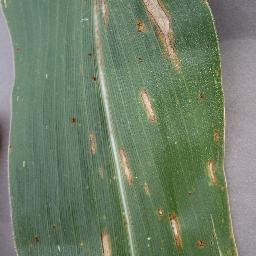

Image 'image (415).JPG' from folder 'Corn___Cercospora_leaf_spot Gray_leaf_spot'


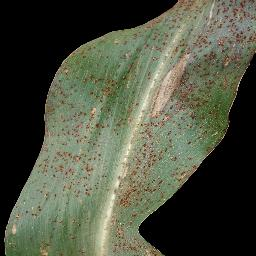

Image 'image (948).JPG' from folder 'Corn___Common_rust'


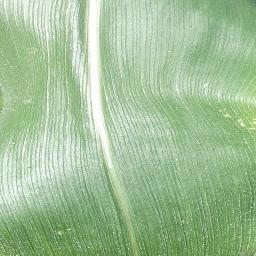

Image 'image (150).jpg' from folder 'Corn___healthy'


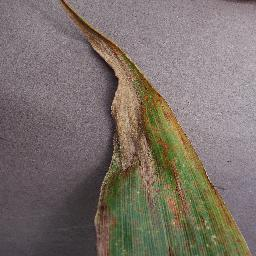

Image 'image (380).jpg' from folder 'Corn___Northern_Leaf_Blight'


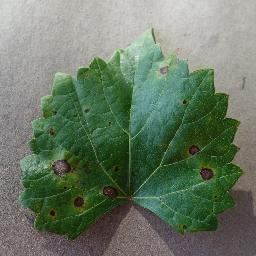

Image 'image (834).JPG' from folder 'Grape___Black_rot'


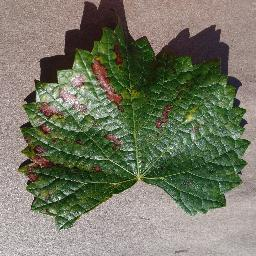

Image 'image (323).JPG' from folder 'Grape___Esca_(Black_Measles)'


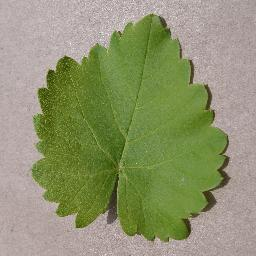

Image 'image (211).JPG' from folder 'Grape___healthy'


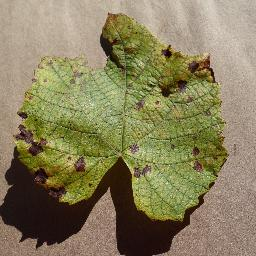

Image 'image (325).JPG' from folder 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'


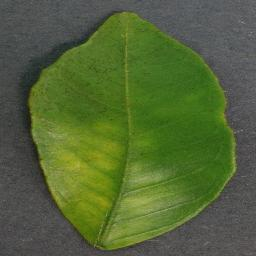

Image 'image (1685).JPG' from folder 'Orange___Haunglongbing_(Citrus_greening)'


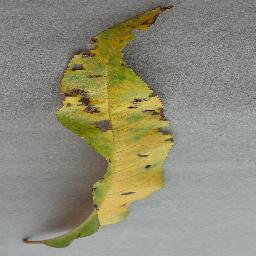

Image 'image (406).JPG' from folder 'Peach___Bacterial_spot'


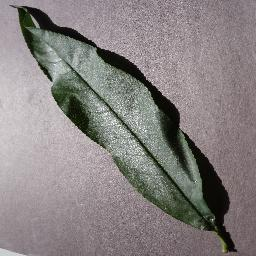

Image 'image (73).JPG' from folder 'Peach___healthy'


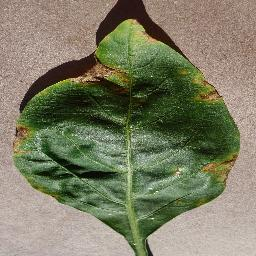

Image 'image (928).JPG' from folder 'Pepper,_bell___Bacterial_spot'


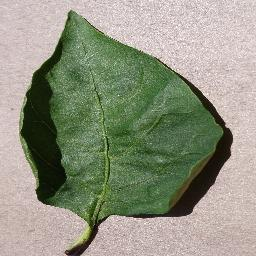

Image 'image (602).JPG' from folder 'Pepper,_bell___healthy'


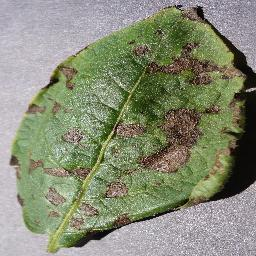

Image 'image (320).JPG' from folder 'Potato___Early_blight'


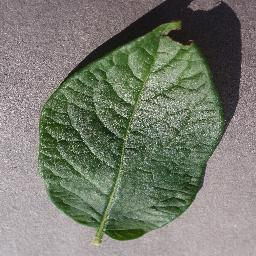

Image 'image (31).JPG' from folder 'Potato___healthy'


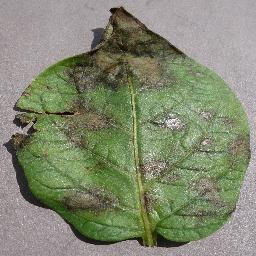

Image 'image (650).JPG' from folder 'Potato___Late_blight'


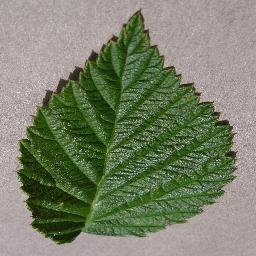

Image 'image (46).JPG' from folder 'Raspberry___healthy'


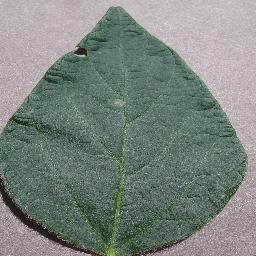

Image 'image (1673).JPG' from folder 'Soybean___healthy'


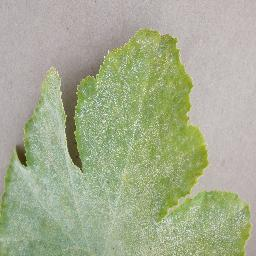

Image 'image (1159).JPG' from folder 'Squash___Powdery_mildew'


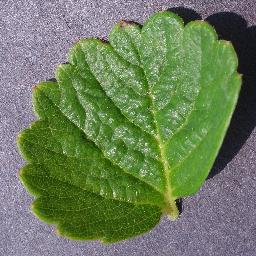

Image 'image (315).JPG' from folder 'Strawberry___healthy'


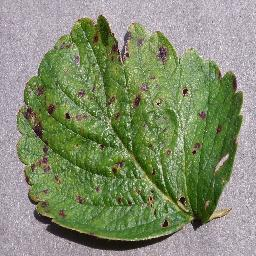

Image 'image (719).JPG' from folder 'Strawberry___Leaf_scorch'


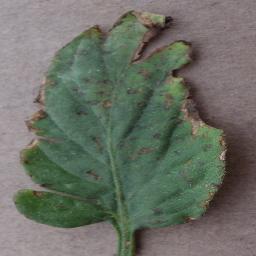

Image 'image (842).JPG' from folder 'Tomato___Bacterial_spot'


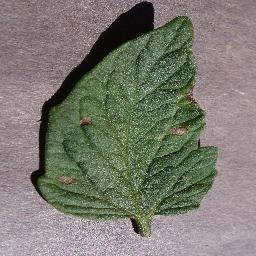

Image 'image (63).JPG' from folder 'Tomato___Early_blight'


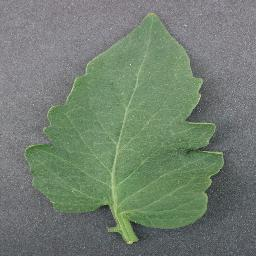

Image 'image (112).JPG' from folder 'Tomato___healthy'


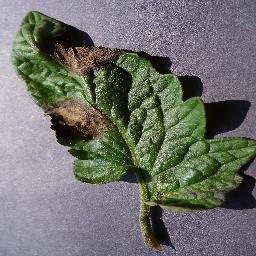

Image 'image (176).JPG' from folder 'Tomato___Late_blight'


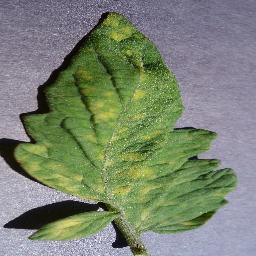

Image 'image (736).JPG' from folder 'Tomato___Leaf_Mold'


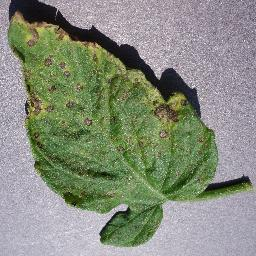

Image 'image (678).JPG' from folder 'Tomato___Septoria_leaf_spot'


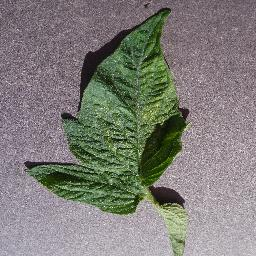

Image 'image (848).JPG' from folder 'Tomato___Spider_mites Two-spotted_spider_mite'


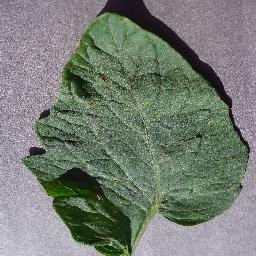

Image 'image (712).JPG' from folder 'Tomato___Target_Spot'


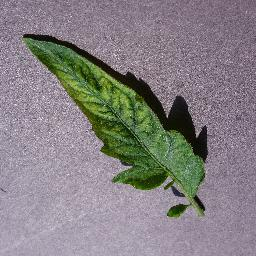

Image 'image (31).JPG' from folder 'Tomato___Tomato_mosaic_virus'


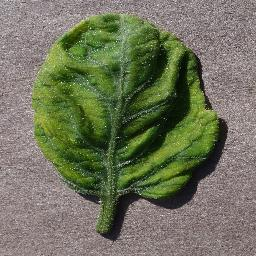

Image 'image (4257).JPG' from folder 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
Image display completed.


In [6]:
import os
import random
from IPython.display import display, Image

# Define the path to the directory containing the folders
data_dir = '/content/drive/MyDrive/Plant_leave_diseases_dataset_without_augmentation_1'

# Iterate over each folder in the directory
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        # List all images in the folder
        images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

        # Check if there are any images in the folder
        if images:
            # Select a random image from the list
            selected_image = random.choice(images)

            # Display the selected image
            image_path = os.path.join(folder_path, selected_image)
            display(Image(image_path))
            print(f"Image '{selected_image}' from folder '{folder_name}'")
        else:
            print(f"No images found in folder '{folder_name}'")
    else:
        print(f"'{folder_name}' is not a directory")

print("Image display completed.")


- Here we can see that folder named as 'Background_without_leaves' which is irrelevent to our dataset so we have to delete it first using **rmtree()** func

In [7]:
import shutil
#shutil provides functions for managing files and directories in Python programs here we used one for deletinga  folder

# provide a path to that specific folder
subfolder_path = '/content/drive/MyDrive/Plant_leave_diseases_dataset_without_augmentation_1/Background_without_leaves'

# Deleting the subfolder
shutil.rmtree(subfolder_path)

print(f"Subfolder '{subfolder_path}' deleted successfully.")


Subfolder '/content/drive/MyDrive/Plant_leave_diseases_dataset_without_augmentation_1/Background_without_leaves' deleted successfully.


- checking the no of folders now

In [8]:

# Path
dataset_dir = '/content/drive/MyDrive/Plant_leave_diseases_dataset_without_augmentation_1'

# List all files and directories in the dataset directory
contents = os.listdir(dataset_dir)

# Filter out only the directories
folders = [folder for folder in contents if os.path.isdir(os.path.join(dataset_dir, folder))]

# Count the number of folders
num_folders = len(folders)

print(f"Number of folders in the dataset: {num_folders}")


Number of folders in the dataset: 38


- Total no of images in our dataset

In [9]:
# Initialize the count variable
image_count = 0

# Iterating over each folder in the dataset directory
for root, dirs, files in os.walk(dataset_dir):
    # Count the files with image extensions in each folder
    image_count += sum(1 for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')))

print(f"Number of images in the dataset: {image_count}")


Number of images in the dataset: 54305


   - Here we can see that initally there were 55,448 images in our dataset but after deleting that irrelevent folder from our dataset we are left with **54,305** images

- Checking whether is there any empty folder

In [10]:
def is_folder_empty(folder_path):
    # List all contents of the folder
    contents = os.listdir(folder_path)
    # Check if the folder is empty
    if len(contents) == 0:
        return True
    # Check if any subfolders are empty
    for item in contents:
        item_path = os.path.join(folder_path, item)
        if os.path.isdir(item_path):
            if is_folder_empty(item_path):
                return True
    return False

# Parent folder(main folder) to check
parent_folder_path = '/content/drive/MyDrive/Plant_leave_diseases_dataset_without_augmentation_1'

# Check if the parent folder or any of its subfolders are empty
if is_folder_empty(parent_folder_path):
    print("The parent folder or one of its subfolders is empty.")
else:
    print("The parent folder's subfolders contain images,hence not empty  .")


The parent folder and all its subfolders contain files or other subfolders.


In [17]:
parent_folder_path = '/content/drive/MyDrive/Plant_leave_diseases_dataset_without_augmentation_1'

# Get a list of all files and directories in the parent folder
contents = os.listdir(parent_folder_path)

# Filter out only the directories
subfolders = [folder for folder in contents if os.path.isdir(os.path.join(parent_folder_path, folder))]

# Print the names of all subfolders
for folder in subfolders:
    print(folder)

Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry___healthy
Cherry___Powdery_mildew
Corn___Cercospora_leaf_spot Gray_leaf_spot
Corn___Common_rust
Corn___healthy
Corn___Northern_Leaf_Blight
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___healthy
Strawberry___Leaf_scorch
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus
